Задача 2.
С помощта на метода на най-малките квадрати да се намери подходяща функция, която приближава дадената таблица.

| x | 2 | 4 | 6 | 7 | 10 | 11 | 14 | 17 | 20 |
| - | - | - | - | - | -- | -- | -- | -- | -- |
| y | 4 | 5 | 6 | 7 | 8  | 8  | 11 | 10 | 12 |

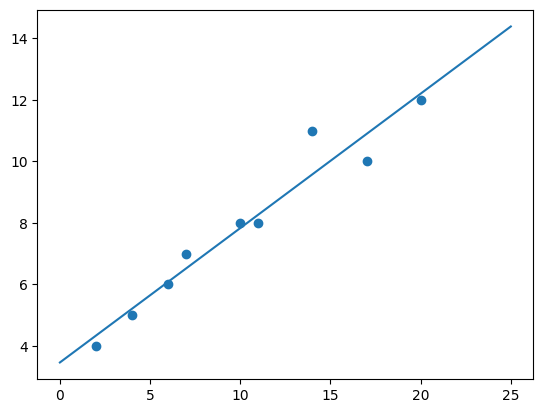

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2,4,6,7,10,11,14,17,20])
y = np.array([4,5,6,7,8,8,11,10,12])

def f(x):
    return 0.437 * x + 3.463

space = np.linspace(0, 25, 1000)

plt.plot(space, f(space))
plt.scatter(x, y)
plt.show()

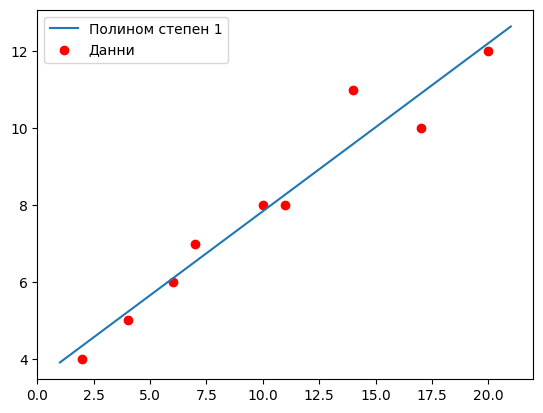

Коефициенти на полинома (a1, a0): [0.43697479 3.47058824]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2, 4, 6, 7, 10, 11, 14, 17, 20])
y = np.array([4, 5, 6, 7, 8, 8, 11, 10, 12])

deg = 1

coef = np.polyfit(x, y, deg)

def poly(x):
    return coef[0]*x + coef[1]

x_space = np.linspace(min(x)-1, max(x)+1, 500)
plt.plot(x_space, poly(x_space), label=f'Полином степен {deg}')
plt.scatter(x, y, color='red', label='Данни')
plt.legend()
plt.show()

print("Коефициенти на полинома (a1, a0):", coef)


Задача 33. Да се намери параболата, която приближава по метода на най-
малките квадрати таблицата

|x| -3| -2| -1| 0| 1| 2| 3|
|-|---|---|---|--|--|--|--|
|y|  7|  4| -1| 1| 5| 6|13|

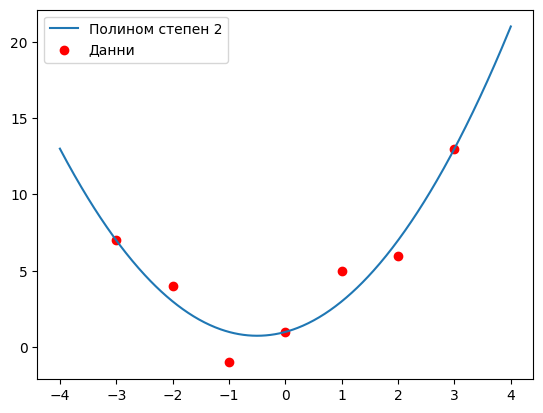

Коефициенти на полинома (a2, a1, a0): [1. 1. 1.]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-3,-2,-1,0,1,2,3])
y = np.array([7,4,-1,1,5,6,13])

deg = 2

coef = np.polyfit(x, y, deg)

def poly(x):
    return coef[0]*x**2 + coef[1]*x + coef[2]

x_space = np.linspace(min(x)-1, max(x)+1, 500)
plt.plot(x_space, poly(x_space), label=f'Полином степен {deg}')
plt.scatter(x, y, color='red', label='Данни')
plt.legend()
plt.show()

print("Коефициенти на полинома (a2, a1, a0):", coef)


Да се реши преопределената система:

2x + y + z = 1,
x + 2y + z = 2,
x + 3y + z = 3,
x + 4y + z = 4,
x + 5y + z = 4,

In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')

def sum_poly(x,y,z):
    return ((2*x + y + z - 1)**2+
            (x + 2*y + z - 2)**2+
            (x + 3*y + z - 3)**2+
            (x - 4*y + z - 4)**2+
            (x + 5*y + z - 4)**2)

equations = [sp.Eq(sp.diff(sum_poly(x,y,z), x), 0),
             sp.Eq(sp.diff(sum_poly(x,y,z), y), 0),
             sp.Eq(sp.diff(sum_poly(x,y,z), z), 0)]

sp.solve(equations)

{x: -41/18, y: -1/18, z: 101/18}

Да се реши преопределената система
x + 2y = 1, x − y = 5, 3x + 4y = 17

In [9]:
import sympy as sp

x = sp.Symbol('x')
y = sp.Symbol('y')

def sum_poly(x,y):
    return ((x + 2*y - 1)**2 +
            (x - y - 5)**2 +
            (3*x + 4*y - 17)**2)

equations = [sp.Eq(sp.diff(sum_poly(x,y), x), 0),
             sp.Eq(sp.diff(sum_poly(x,y), y), 0)]

sp.solve(equations)

{x: 176/31, y: -13/31}

С помощта на метода на най-малките квадрати да се приближи функция от вида

𝑦=𝑎*10**(b*x)

След това да се извърши линейна регресия на модела и да се визуализира полученото приближение заедно с данните в една координатна система.

x| 0.4| 0.8| 1.2| 1.6|   2| 2.3|
-|----|----|----|----|----|----|
y|800 |975 |1500|1950|2900|3600|

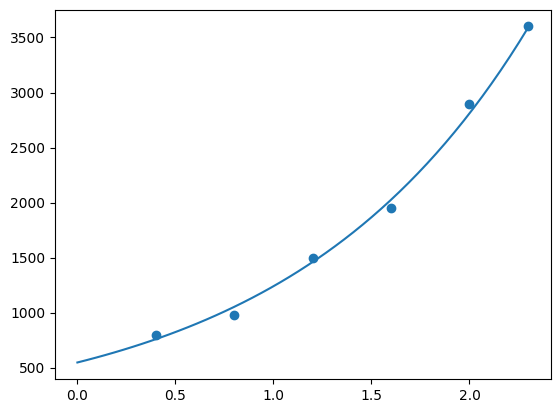

In [17]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.4,0.8,1.2,1.6,2,2.3])
y = np.array([800,975,1500,1950,2900,3600])

b = sp.Symbol('b')
c = sp.Symbol('c')

def f_cherta(c,b,x):
    return c + b*x

def phi(c, b):
    sum_of_squares = 0
    for i in range(x.size):
        sum_of_squares += (f_cherta(c,b,x[i]) - np.log10(y[i]))**2
    return sum_of_squares

eqs = [sp.Eq(sp.diff(phi(c,b), b), 0),sp.Eq(sp.diff(phi(c,b), c), 0)]
sol = sp.solve(eqs)

def exp_func(x):
    return 10**(float(sol[b]) * x + float(sol[c]))

space = np.linspace(0, 2.3)
plt.plot(space, exp_func(space))
plt.scatter(x,y)
plt.show()
# output: {b: 0.355535711058098, c: 2.73766242833211}

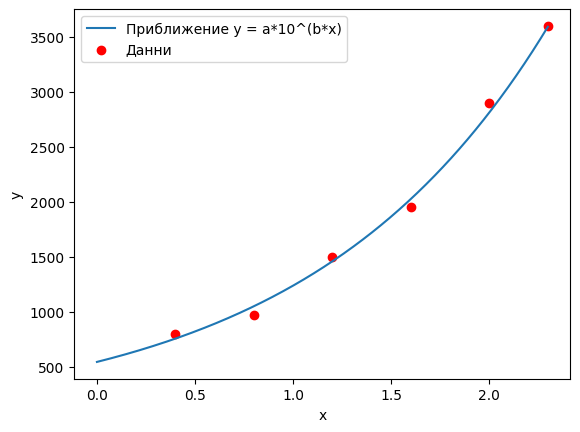

a ≈ 546.59, b ≈ 0.35554


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# данни
x = np.array([0.4, 0.8, 1.2, 1.6, 2, 2.3])
y = np.array([800, 975, 1500, 1950, 2900, 3600])

# логаритмираме y (основа 10)
logy = np.log10(y)

# линейна регресия: log10(y) = c + b*x
b, c = np.polyfit(x, logy, 1)  # връща [b, c]

# възстановяваме оригиналната функция: y = 10^c * 10^(b*x)
a = 10**c
def exp_func(x):
    return a * 10**(b*x)

# визуализация
x_space = np.linspace(0, 2.3, 500)
plt.plot(x_space, exp_func(x_space), label='Приближение y = a*10^(b*x)')
plt.scatter(x, y, color='red', label='Данни')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# печат на коефициентите
print(f"a ≈ {a:.2f}, b ≈ {b:.5f}")
